# Examples of Dynamic Ordered Persistence Editing (DOPE)

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
sys.path.append("..")
from mergetree import *
from matching import *
from matching_plots import *
import pyts.datasets

## Example 1: Wii Motions

An example of an optimal DOPE matching between the x coordinates of the Nintendo Wii mote of two different people performing a “one left circle” motion, as obtained from the <a href = "https://www.cs.ucr.edu/~eamonn/time_series_data_2018/">UCR time series database</a>.  Our matching highlights the most important critical points that are matched between these, even though they occur at different absolute times.


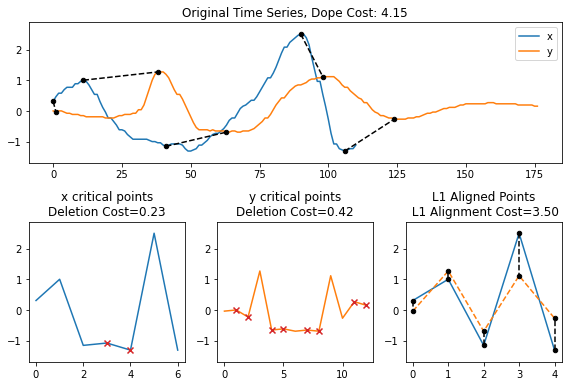

In [2]:
dataset = "AllGestureWiimoteX"
res = pyts.datasets.fetch_ucr_dataset(dataset)
idx = np.argsort(res['target_train'])
X = res['data_train'][idx, :]


circular = False
plt.figure(figsize=(8, 8))

i = 211
j = 212

x = X[i, :]
x = x[~np.isnan(x)]
xc, xs, xc_idx = get_crit_timeseries(x, circular)

y = X[j, :]
y = y[~np.isnan(y)]
yc, ys, yc_idx = get_crit_timeseries(y, circular)
cost, xdel, ydel = dope_match(x, y, circular)
plt.clf()
plot_dope_matching(x, y, xc, xs, xc_idx, yc, ys, yc_idx, cost, xdel, ydel, plot_matches=True, plot_verified=False)
#plt.savefig("WiiDOPE{}_{}.svg".format(i, j), bbox_inches='tight', facecolor='white')

## Example 2: Synthetic Noisy Trending Up Sinusoids

The example below shows DOPE matchings between two synthetic time series in a way that highlights our stability result, as well as its invariance to parameteriation.  Noise is added, but the distance does not exceed the amount of noise added.

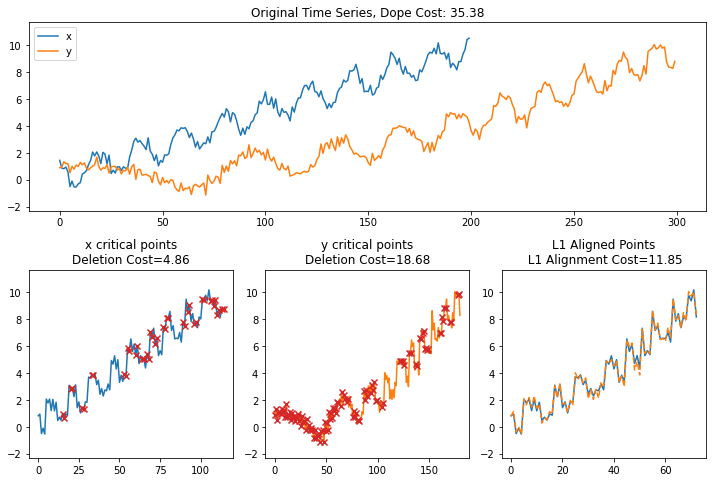

In [3]:
circular=False

np.random.seed(0)
N = 200
t = np.linspace(0.01, 0.98, N)
x = np.cos(2*np.pi*t*10) + t*10
x += 0.3*np.random.randn(N)
N = 300
t = np.linspace(0.01, 0.98, N)
y = np.cos(2*np.pi*(t**2)*10) + (t**2)*10
y += 0.3*np.random.randn(N)

xc, xs, xc_idx = get_crit_timeseries(x, circular)
yc, ys, yc_idx = get_crit_timeseries(y, circular)

cost, xdel, ydel = dope_match(x, y, circular)

plt.figure(figsize=(10, 10))
plot_dope_matching(x, y, xc, xs, xc_idx, yc, ys, yc_idx, cost, xdel, ydel, plot_matches=False, plot_verified=False)
plt.savefig("TrendUp.svg", bbox_inches='tight', facecolor='white')

#plt.savefig("WiiDOPE{}_{}.svg".format(i, j), bbox_inches='tight', facecolor='white')

## Example 3: Reflected Time Series

The example below highlights the informativity of our technique.  While methods based on persistence diagrams cannot tell the difference between reflected time series, DOPE forces pairs of critical points to match in time order, so it is forced to delete many pairs and pay a cost for time series that are reflected versions of each other

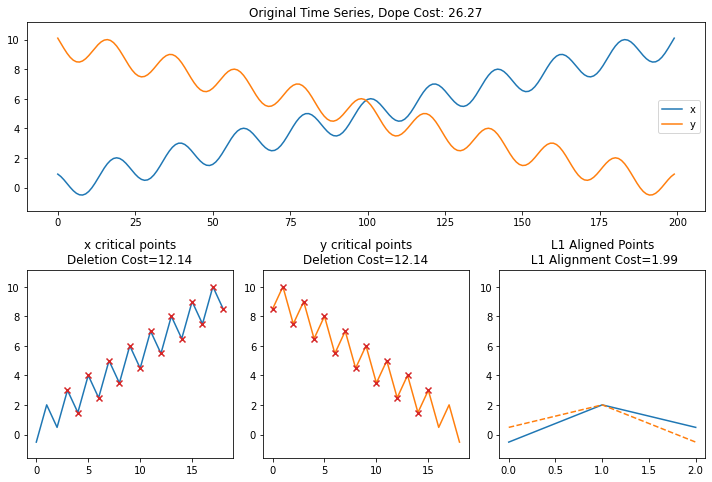

In [4]:
circular=False

np.random.seed(0)
N = 200
t = np.linspace(0.01, 0.98, N)
x = np.cos(2*np.pi*t*10) + t*10
N = 200
t = np.linspace(0.01, 0.98, N)
y = np.cos(2*np.pi*(t**2)*10) + (t**2)*10
y = x[::-1]

xc, xs, xc_idx = get_crit_timeseries(x, circular)
yc, ys, yc_idx = get_crit_timeseries(y, circular)

cost, xdel, ydel = dope_match(x, y, circular)

plt.figure(figsize=(10, 10))
plot_dope_matching(x, y, xc, xs, xc_idx, yc, ys, yc_idx, cost, xdel, ydel, plot_matches=False, plot_verified=False)
plt.savefig("Reflect.svg", bbox_inches='tight', facecolor='white')

#plt.savefig("WiiDOPE{}_{}.svg".format(i, j), bbox_inches='tight', facecolor='white')